In [ ]:
#Biblioteki języka python nięzbędne do wykonania przykładów z rozdziału IV
import time
import numpy as np
import scipy.sparse.linalg as scilin
import matplotlib.pyplot as plt

<h2>ROZDZIAŁ V</h2>

<h3>5	ROZWIĄZYWANIE UKŁADÓW  RÓWNAŃ LINIOWYCH</h3>

<h4>5.1.	PRZYKŁAD ZADANIA INŻYNIERSKIEGO</h4>

<p><b>Przykład 5.1.</b> Wyznaczenie reakcji</p> 

Oblicz reakcje w przegubach B i C oraz w utwierdzeniu A układu belek pokazanego na rysunku 5.1.

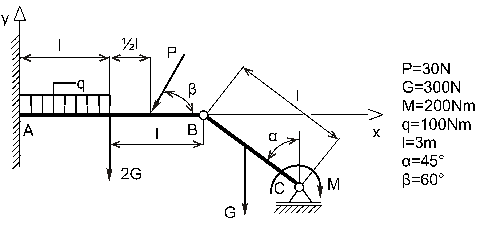

Rys. 5.1. Układ dwóch belek

Rozdzielony i oswobodzony z więzów układ belek przedstawia rysunek 5.2.

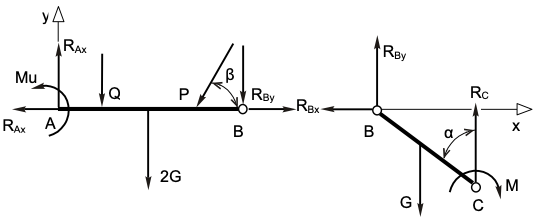

Rys. 5.2. Belki oswobodzone z więzów

Układ belek jest statycznie wyznaczalny. W pierwszej kolejności należy z układu równań warunków równowagi dla belki $BC$ wyznaczyć reakcje $R_{C}$, $R_{Bx}$, $R_{By}$, a następnie z układu równań warunków równowagi dla belki $AB$ należy obliczyć reakcje $R_{Ax}$, $R_{Ay}$ oraz moment utwierdzenia $M_{u}$. Obciążenie ciągłe $q$ zastępujemy siłą skupioną $Q = ql$ zaczepioną w środku długości tego obciążenia.

<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $
        \begin{cases} R_{Bx}=0 \\ R_{By}-G+R_{C}=0 \\ -G\frac{1}{2}l sin\alpha-M+R_{C}lsin \alpha=0 \\ R_{Ax}-Pcos \beta=0 \\ R_{Ay}-Q-2G-Psin \beta-R_{By}=0 \\ M_{u}-Q\frac{1}{2}l-2Gl-P\frac{2}{3}lsin \beta-R_{By}2l=0 \end{cases}
        $
        </td>
        <td>(5.1)</td>
    </tr>
</table>

Rozwiązanie układu równań liniowych (5.1) jest zagadnieniem stosunkowo prostym, lecz czasochłonnym. Opracowano wiele metod numerycznych rozwiązywania tego typu zagadnień. Większość z nich znajduje zastosowanie tam, gdzie istnieje potrzeba rozwiązywania układów dla dużej lub bardzo dużej liczby niewiadomych.

<h4>5.2.	CHARAKTERYSTYKA ZAGADNIENIA NUMERYCZNEGO</h4> 

Przez układ równań liniowych rozumie się koniunkcje pewnej liczby równań algebraicznych, które spełniane są przez te same wartości niewiadomych danych w równaniach w pierwszej potędze. Przez rozwiązanie układu równań rozumiemy znalezienie takich liczb, które po podstawieniu w miejsce niewiadomych spełniają układ równań.

Układy równań liniowych algebraicznych pojawiają się bardzo często w technice i są np.: podstawową formą opisu zagadnień fizycznych modelujących zagadnienia statyki, termodynamiki oraz elektrotechniki.

Ponadto, konieczność rozwiązania układu równań liniowych pojawia się często w innych algorytmach numerycznych, np. interpolacji, aproksymacji lub w wielu metodach bazujących na linearyzacji równań nieliniowych, np. przy rozwiązywaniu układów równań nieliniowych.

<h4>5.2.1.	Przekształcanie układu równań do zapisu macierzowego</h4>

Układ równań liniowych można zapisać w postaci macierzowej, w której $A$ jest macierzą główną układu o $m$ wierszach i $n$ kolumnach ($m$ – odpowiada liczbie równań w układzie, $n$ – odpowiada liczbie niewiadomych), $b$ jest wektorem wyrazów wolnych o $m$ elementach, $x$ wektorem $n$ niewiadomych. 
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $A \times x=b$
        </td>
        <td>(5.2)</td>
    </tr>
</table>
Macierz główna układu $A$ nie musi być kwadratowa. W ogólnym przypadku $A$ jest macierzą o $m$-wierszach (równaniach) i $n$-kolumnach (niewiadomych), co prowadzi do trzech typów układów równań liniowych. Jeżeli $m = n$, to liczba równań i niewiadomych jest zgodna, a macierz $A$ jest kwadratowa. Jeżeli $m > n$, to liczba równań jest większa od liczby niewiadomych. Jeżeli $m < n$, to liczba równań jest mniejsza od liczby niewiadomych.

Procedura formowania macierzy i wektorów w zapisie (5.2) składa się z etapów:
1.	Zapisanie równań w formie układu na podstawie modelu.
2.	Identyfikacja niewiadomych i ich uporządkowanie.
3.	Przeniesienie elementów równań związanych z niewiadomymi na lewą stronę znaku równości w ustalonym porządku.
4.	Przeniesienie elementów równań związanych z danymi na prawą stronę znaku równości.
5.	Zapisanie elementów układu równań w postaci macierzy.

<b>Przykład 5.2. Przekształcenie układu równań do zapisu macierzowego</b>

Przekształcić układ równań z przykładu 5.1 do zapisu macierzowego. 

Identyfikujemy niewiadome i porządkujemy je. Niewiadome to $R_{Ax}$, $R_{Ay}$, $R_{Bx}$, $R_{By}$, $R_{C}$, $M_{u}$ stąd otrzymujemy wektor niewiadomych:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $x=\begin{bmatrix} R_{Ax} \\ R_{Ay} \\ R_{Bx} \\ R_{By} \\ R_{C} \\ M_{u} \end{bmatrix}$
        </td>
        <td>(5.3)</td>
    </tr>
</table>
Przenosimy elementy równań związane z niewiadomymi na lewą stronę znaku równości porządkując je zgodnie z przyjętą kolejnością. Elementy równań nie zawierające niewiadomych przenosimy na prawą stronę znaku równości:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{cases} R_{Bx}=0 \\ R_{By}+R_{C}=G \\ R_{C}lsin\alpha=G\frac{1}{2}lsin\alpha+M \\ R_{Ax}=Pcos\beta \\ R_{Ay}-R_{By}=Q+2G+Psin\beta \\ M_{u}-R_{By}2l=Q\frac{1}{2}l+2Gl+P\frac{2}{3}lsin\beta \end{cases}$
        </td>
        <td>(5.4)</td>
    </tr>
</table>
W każdym z równań dopisujemy element zawierający brakujące nie-wiadome z ustalonej listy ze współczynnikiem zero. Przenosimy wartości w składnikach równań zawierających niewiadome przed symbol niewiadomej:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{cases} 0R_{Ax}+0R_{Ay}+1R_{Bx}+0R_{By}+0R_{C}+0M_{u}=0 \\ 0R_{Ax}+0R_{Ay}+0R_{Bx}+1R_{By}+1R_{C}+0M_{u}=G \\ 0R_{Ax}+0R_{Ay}+0R_{Bx}+0R_{By}+lsin\alpha R_{C}+0M_{u}=G\frac{1}{2}lsin\alpha+M \\ 1R_{Ax}+0R_{Ay}+0R_{Bx}+0R_{By}+0R_{C}+0M_{u}=Pcos\beta \\ 0R_{Ax}+1R_{Ay}+0R_{Bx}-1R_{By}+0R_{C}+0M_{u}=Q+2G+Psin\beta \\ 0R_{Ax}+0R_{Ay}+0R_{Bx}-2lR_{By}+0R_{C}+1M_{u}=Q\frac{1}{2}l+2Gl+P\frac{2}{3}lsin\beta \end{cases}$
        </td>
        <td>(5.5)</td>
    </tr>
</table>
Zapisujemy współczynniki stojące przy niewiadomych w formie macierzy. Otrzymujemy stąd macierz główną układu $A$. Zapisując wartości znajdujące się za znakiem równości, otrzymujemy wektor wyrazów wolnych układu $b$.
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
$\begin{bmatrix} 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 1 & 0 \\ 0 & 0 & 0 & 0 & lsin\alpha & 0 \\ 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & -1 & 0 & 0 \\ 0 & 0 & 0 & -2l & 0 & 1 \end{bmatrix}, b=\begin{bmatrix} 0 \\ G \\ G\frac{1}{2}lsin\alpha+M \\ Pcos\beta \\ Q+2G+Psin\beta \\ Q\frac{1}{2}l+2Gl+P\frac{2}{3}lsin\beta \end{bmatrix}$
        </td>
        <td>(5.6)</td>
    </tr>
</table>
Kompletny układ równań posiada postać zgodną z zależnością (5.2).
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{bmatrix} 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 1 & 0 \\ 0 & 0 & 0 & 0 & lsin\alpha & 0 \\ 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & -1 & 0 & 0 \\ 0 & 0 & 0 & -2l & 0 & 1 \end{bmatrix}\times\begin{bmatrix} R_{Ax} \\ R_{Ay} \\ R_{Bx} \\ R_{By} \\ R_{C} \\ M_{u} \end{bmatrix}=\begin{bmatrix} 0 \\ G \\ G\frac{1}{2}lsin\alpha+M \\ Pcos\beta \\ Q+2G+Psin\beta \\ Q\frac{1}{2}l+2Gl+P\frac{2}{3}lsin\beta \end{bmatrix}$
        </td>
        <td>(5.7)</td>
    </tr>
</table>
Macierz główna $A$ posiada więcej elementów o wartościach zerowych niż niezerowych. Jest to przykład tzw. macierzy rzadkiej.

<h4>5.2.2.	Warunki istnienia rozwiązania</h4>

Dla dowolnej postaci macierzy $A$ warunki rozwiązywalności układów równań liniowych rozstrzyga twierdzenie Croneckera-Capelli, na podstawie badania rzędu macierzy głównej $A$ i rzędu macierzy głównej uzupełnionej kolumną wyrazów wolnych $b$. W przypadku interesującej nas kwadratowej macierzy głównej $A$ układu równań, rząd macierzy równy liczbie kolumn automatycznie gwarantuje, że układ równań posiada jednoznaczne rozwiązanie. Rzędem macierzy nazywamy liczbę jej niezależnych liniowo kolumn lub wierszy.

<b>Przykład 5.3. Rząd macierzy</b>

Wyznaczyć w Matlabie rząd macierzy głównej $A$ dla zagadnienia z przykładu 5.1 dla danych  $l = 3\mbox{m}$; $\alpha= 45^{\circ}$.
Wprowadzamy macierz $A$ do obszaru zmiennych.

In [ ]:
A=np.matrix([[0, 0, 1, 0, 0, 0],
            [0, 0, 0, 1, 1, 0],
            [0, 0, 0, 0, -3.0*np.sin(45.0*np.pi/180.0), 0],
            [1, 0, 0, 0, 0, 0],
            [0, 1, 0, -1, 0, 0],
            [0, 0, 0, -23, 0, 1]],np.float64)
print(A)

Obliczamy rząd macierzy $A$ korzystając z polecenia matrix_rank.

In [ ]:
r = np.linalg.matrix_rank(A)
print(r)

W technice utworzenie układu równań liniowych o niejednoznacznym rozwiązaniu świadczy z reguły o błędnie sformułowanym matematycznym opisie zjawiska, np. błędach popełnionych przy formułowaniu równań. Dlatego też pominiemy dalsze rozważania nad twierdzeniem Croneckera-Capelli.

<h4>5.2.3.	Układy równań liniowych – formalne metody rozwiązywania</h4>

Dla układów równań, w których macierz główna $A$ jest macierzą kwadratową $m = n$ rozwiązanie formalne polega na znalezieniu odwrotności macierzy $A$, czyli $A^{-1}$, a następnie wyznaczeniu iloczynu wektorowego. Czyli:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $A \times x=b \Rightarrow x=A^{-1} \times b$
        </td>
        <td>(5.8)</td>
    </tr>
</table>
Równanie (5.8) jest macierzowym zapisem wzorów Cramera. Numeryczne wyznaczanie odwrotności macierzy nie jest powszechnie wykorzystywane, ponieważ jest czasochłonne i mniej dokładne niż metody alternatywne. Warto sobie uzmysłowić, że liczba mnożeń potrzebnych do obliczania wyznacznika n-tego stopnia za pomocą rozwijania względem wiersza wynosi n!. Policzmy w poniższym przykładzie czas potrzebny na obliczenie wyznacznika.

<b>Przykład 5.4. Obliczanie wyznacznika za pomocą reguł rozwijania</b>

Liczba mnożeń dla macierzy o rozmiarach 15 × 15 i 20 × 20 wynosi:

In [ ]:
print(np.math.factorial(15))
print(np.math.factorial(20))

Czas potrzebny na wykonanie 10<sup>6</sup> mnożeń wynosi:

In [ ]:
t = time.time()
for i in range(1000000):
    np.pi * np.pi
czas = time.time() - t
print(czas)

Czas potrzebny na wyliczenie wyznacznika z macierzy 15 × 15 wyrażony w dniach:

In [ ]:
print(np.math.factorial(15)*czas/10e6/60.0/60.0/24.0)

Dla macierzy 20 × 20 czas ten to:

In [ ]:
print(np.math.factorial(20)*czas/10e6/60.0/60.0/24.0)

W metodach numerycznych istnieją algorytmy umożliwiające uzyskanie rozwiązania w wyniku wyznaczania odwrotności macierzy. Nie są to oczywiście metody oparte na rozwijaniu względem kolumny lub wiersza.

<b>Przykład 5.5. Odwracanie macierzy</b>

Wyznaczyć rozwiązanie zadania z przykładu 5.1 zgodnie z zależnością (5.8).
Na bazie danych z przykładu 5.2 wprowadźmy wektor $b$ do obszaru zmiennych:

In [ ]:
b=np.matrix([[0], [300], [300.0*0.5*3.0*np.sin(45.0*np.pi/180.0)+200.0],
                  [30.0*np.cos(60.0*np.pi/180.0)],[3.0*100.0+2.0*300.0+30.0*np.sin(60.0*np.pi/180.0)],
                  [3.0*100.0*0.5*3.0+2.0*300.0*3.0+30.0*(2.0/3.0)*3.0*np.sin(60.0*np.pi/180.0)]])
print(b)

Korzystając z polecenia ```inv()``` obliczamy odwrotność macierzy $A$, a korzystając z zależności (8.2) wyznaczamy rozwiązanie układu równań.

In [ ]:
x = np.linalg.inv(A)*b
print(x)

Kolejne elementy wektora rozwiązań $x$ to wartości kolejnych niewiadomych układu równań, uporządkowane w kolejności przyjętej podczas formowania macierzy układu:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $x=\begin{bmatrix} R_{Ax} \\ R_{Ay} \\ R_{Bx} \\ R_{By} \\ R_{C} \\ M_{u} \end{bmatrix}=\begin{bmatrix} 15.00 \\ 1470.26 \\ 0.00 \\ 544.28 \\  -244.28 \\ 14820.42 \end{bmatrix}$
        </td>
        <td>&nbsp;</td>
    </tr>
</table>

<h4>5.2.4. Dokładność rozwiązania</h4>

Zgodnie z zależnością (5.8) rozwiązanie układu równań liniowych istnieje, kiedy istnieje odwrotność macierzy głównej $A$. Jednocześnie należy zauważyć, że są macierze, dla których nie można wyznaczyć macierzy odwrotnej. Macierze tego typu nazywamy osobliwymi. Macierz o wymiarach $n \times n$ jest macierzą osobliwą, gdy: jej kolumny lub wiersze są liniowo zależne (rząd macierzy jest mniejszy od liczby kolumn lub wierszy) lub wyznacznik macierzy jest równy zeru. Osobliwość macierzy głównej układu równań powoduje, że rozwiązanie tego układu może nie istnieć, a jeżeli istnieje, to nie jest jednoznaczne.

Na skutek występowania błędów zaokrągleń w arytmetyce zmiennopozycyjnej istnieją macierze nieosobliwe, które stają się macierzami osobliwymi lub bliskimi osobliwej.

<h4>5.2.4.1. Wskaźnik uwarunkowania</h4>

Udowodniono, że wpływ błędów zaokrągleń w zapisie elementów macierzy głównej $A$ lub wektora wyrazów wolnych $b$ na rozwiązanie układów równań liniowych jest mały tylko wtedy, gdy mała jest wartość $\begin{Vmatrix} A \end{Vmatrix} \begin{Vmatrix}A^{-1}\end{Vmatrix}$. Wartość tego iloczynu nazywana jest wskaźnikiem uwarunkowania i zapisywana jako:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\kappa(A)=\begin{Vmatrix} A \end{Vmatrix} \begin{Vmatrix}A^{-1}\end{Vmatrix}$
        </td>
        <td>(5.9)</td>
    </tr>
</table>
Wskaźnik uwarunkowania jest liczbą z zakresu od 1 do $\infty$. Charakteryzuje on własności macierzy $A$. Duża wartość $\kappa(A)$ oznacza, że każdy algorytm numerycznego rozwiązywania układu równań jest wrażliwy na błędy zaokrągleń. Układ równań z macierzą główną $A$ o dużej wartości wskaźnika uwarunkowania nazywamy źle uwarunkowanym. W arytmetyce, w której nie występują błędy zaokrągleń, dowolna macierz jest osobliwa dla $\kappa(A) = \infty$ i nieosobliwa dla $\kappa(A) = 1$.

Jeżeli macierz główna $A$ i wektor wyrazów wolnych $b$ są zapisane z dokładnością obliczeniową maszyny $\epsilon_{m}$, numeryczne rozwiązanie jest dane do $d$ cyfr znaczących (zależność dotyczy metod dokładnych):
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $d = \begin{vmatrix}log_{10}(\epsilon_{m})\end{vmatrix}-log_{10}(\kappa(A))$
        </td>
        <td>(5.10)</td>
    </tr>
</table>

<b>Przykład 5.6. Współczynnik uwarunkowania</b>

Wyznaczyć współczynnik uwarunkowania macierzy $A$ z przykładu 5.1 za pomocą polecenia ```cond()```. Ustalić liczbę cyfr znaczących w rozwiązaniu.

In [ ]:
kappa = np.linalg.cond(A)
print(kappa)

d = np.abs(np.log10(np.finfo(np.float64).eps)) - np.log10(np.linalg.cond(A))
print(d)

W wyniku uzyskano wskaźnik uwarunkowania $\kappa(A)$ o niewielkiej wartości. Daje to aż 14 cyfr znaczących w wyniku.

<h4>5.2.4.2. Wektor reszt</h4>

Jeśli $\hat{x}$ jest przybliżonym (numerycznym) rozwiązaniem układu równań liniowych, zaś $x$ jest jego rozwiązaniem dokładnym, to wektor reszt $r$ określa, jaki popełniamy błąd:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $r = b - A \times \hat{x}$
        </td>
        <td>(5.11)</td>
    </tr>
</table>
Przy czym wykazano, że:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\displaystyle\frac{\begin{Vmatrix} \hat{x}-x \end{Vmatrix}}{\begin{Vmatrix} \hat{x}\end{Vmatrix}}=\kappa(A)\frac{\begin{Vmatrix}r\end{Vmatrix}}{\begin{Vmatrix}b\end{Vmatrix}}$
        </td>
        <td>(5.12)</td>
    </tr>
</table>
Niewielka wartość normy wektora reszt $r$ nie gwarantuje istnienia małej normy różnicy $\hat{x}-x$. Jeśli bowiem wartość $\kappa$ jest duża, nie ma gwarancji, że wyznaczone przez algorytm numeryczny rozwiązanie $\hat{x}$ jest zbliżone do rozwiązania dokładnego $x$.

<h3>5.3. METODY NUMERYCZNE ROZWIĄZYWANIA UKŁADÓW RÓWNAŃ LINIOWYCH</h3>

<h4>5.3.1. Metody dokładne</h4>

Jeżeli rozwiązanie układu równań $A \times x = b$ polega na takim przekształceniu macierzy $A$ i wektora $b$, że przy założeniu dokładnego obliczania wyrażeń arytmetycznych, po skończonej liczbie działań, otrzymujemy rozwiązanie, to taką metodę rozwiązywania nazywamy dokładną. Jednakże pamiętać należy, że metody dokładne dla zadań źle uwarunkowanych numerycznie mogą dawać rozwiązanie obarczone dużym błędem. Metody te nie dają błędu metody, lecz mogą być niestabilne ze względu na błędy zaokrągleń.

<h3>5.3.1.1. Uprzywilejowane postacie macierzy głównej układu</h3>

Niektóre postaci macierzy głównej układu $A$, biorąc pod uwagę rozwiązywanie układu równań metodami numerycznymi, są postaciami uprzywilejowanymi ze względu na prostotę wyznaczenia rozwiązania.

<b>Przykład 5.7. Macierz diagonalna</b>

Rozważmy układ równań:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $A=\begin{bmatrix} 1 & 0 & 0 \\ 0 & 3 & 0 \\ 0 & 0 & 5\end{bmatrix}, b=\begin{bmatrix} -1 \\ 6 \\ -15 \end{bmatrix}$
        </td>
        <td>(5.13)</td>
    </tr>
</table>
Jest on równoznaczny z następującym układem równań:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{cases} x_{1}=-1 \\ 3x_{2}=6 \\ 5x_{3}=-15\end{cases}$
        </td>
        <td>(5.14)</td>
    </tr>
</table>
Jego rozwiązanie to:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{cases} x_{1}=-1 \\ x_{2}=\displaystyle\frac{6}{3}=2 \\ x_{3}=\displaystyle\frac{-15}{5}=-3\end{cases}$
        </td>
        <td>(5.15)</td>
    </tr>
</table>
Rozwiązanie układu równań z diagonalną macierzą główną $A$ sprowadza się do podzielenia kolejnych elementów wektora wyrazów wolnych $b$ przez kolejne elementy na głównej przekątnej macierzy $A$.

Układy równań, w których macierz główna $A$ jest macierzą trójkątną górną lub dolną mogą być rozwiązane przez postępowanie wprost lub przez postępowanie odwrotne.

<b>Przykład 5.8. Macierz trójkątna górna</b>

Układ równań, w którym A jest górną macierzą trójkątną:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $A=\begin{bmatrix} -2 & 1 & 2 \\ 0 & 3 & -2 \\ 0 & 0 & 4\end{bmatrix}, b=\begin{bmatrix} 9 \\ -1 \\ 8 \end{bmatrix}$
        </td>
        <td>(5.16)</td>
    </tr>
</table>
Jest równoznaczny z układem:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{cases} -2x_{1}+1x_{2}+2x_{3}=9 \\ 3x_{2}-2x_{3}=-1 \\ 4x_{3}=8\end{cases}$
        </td>
        <td>(5.17)</td>
    </tr>
</table>
Rozwiązując ostatnie równanie otrzymujemy:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $x_{3}=\displaystyle\frac{8}{4}=2$
        </td>
        <td>(5.18)</td>
    </tr>
</table>
Następnie drugie równanie:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $x_{2}=\displaystyle\frac{1}{3}(-1+2x_{3})=\displaystyle\frac{3}{3}=1$
        </td>
        <td>(5.19)</td>
    </tr>
</table>
A na końcu równanie pierwsze:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $x_{1}=\displaystyle\frac{1}{-2}(9-x_{2}-2x_{3})=\displaystyle\frac{4}{-2}=-2$
        </td>
        <td>(5.20)</td>
    </tr>
</table>
W ogólnym przypadku dla ostatniego równania w układzie:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $x_{n}=\displaystyle\frac{b_{n}}{a_{nn}}$
        </td>
        <td>(5.21)</td>
    </tr>
</table>
gdzie:<br>
$n$ – liczba wierszy macierzy $A$.

Dla pozostałych równań obowiązuje zależność (dla każdego $i\neq 1,...,n$).
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $x_{i-1}=\displaystyle\frac{b_{i}-\sum\limits_{k=i+1}^{n}a_{ik}x_{k}}{a_{ii}}$
        </td>
        <td>(5.22)</td>
    </tr>
</table>
gdzie:<br>
$i$ – indeks wiersza w macierzy $A$,<br>
$k$ – indeks kolumny w macierzy $A$.

Proces obliczania kolejnych niewiadomych począwszy od $x_{n}$ do $x_{1}$ dla górnej macierzy trójkątnej $A$ nazywany jest postępowaniem odwrotnym. Podobna procedura obliczania kolejnych niewiadomych od $x_{1}$ do $x_{n}$, dla dolnej macierzy trójkątnej $A$ nazywana jest postępowaniem wprost.

<h4>5.3.1.2. Metoda eliminacji Gaussa</h4>

Najczęściej stosowaną metodą numerycznego rozwiązywania układów równań liniowych jest metoda eliminacji Gaussa. Polega ona na przekształceniu kwadratowej macierzy głównej $A$ do macierzy górnej trójkątnej. Eliminacja realizowana jest przez elementarne działania na wierszach macierzy $A$ i $b$.

<b>Przykład 5.9. Metoda eliminacji Gaussa</b>

Wykorzystując elementarne działania na wierszach macierzy rozwiązać układ równań liniowych:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{cases} x_{1}+2x_{2}-3x_{3}=1 \\ 2x_{1}+x_{2}+4x_{3}=2 \\ -x_{1}+4x_{2}+x_{3}=-1\end{cases}$
        </td>
        <td>(5.23)</td>
    </tr>
</table>
Przekształcenie układu równań do zapisu macierzowego:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $A \times x = \begin{bmatrix}1 & 2 & -3 \\ 2 & 1 & 4 \\ -1 & 4 &  1\end{bmatrix} \times \begin{bmatrix} x_{1} \\ x_{2} \\ x_{3}\end{bmatrix}=\begin{bmatrix} 1 \\ 2 \\ -2\end{bmatrix}$
        </td>
        <td>(5.24)</td>
    </tr>
</table>
Utworzenie rozszerzonej o wektor $b$ macierzy $A$:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{bmatrix}A & b\end{bmatrix}=\begin{bmatrix}1 & 2 & -3 & 1\\ 2 & 1 & 4 & 2\\ -1 & 4 & 1 & -2\end{bmatrix}$
        </td>
        <td>(5.25)</td>
    </tr>
</table>
Redukcja elementów macierzy pod główną przekątną w pierwszej kolumnie. Redukcja następuje przez pomnożenie pierwszego wiersza macierzy $A$ przez 2 i odjęcie go od drugiego wiersza oraz pomnożenie pierwszego wiersza przez –1 i odjęcie go od wiersza trzeciego. Wynikiem tych działań jest:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{bmatrix}A & b\end{bmatrix} = \begin{bmatrix}1 & 2 & -3 & 1\\ 2 & 1 & 4 & 2\\ -1 & 4 & 1 & -2 \end{bmatrix}$
        </td>
        <td>(5.26)</td>
    </tr>
</table>
Redukcja elementów pod główną przekątną w kolumnie drugiej następuje przez odjęcie drugiego wiersza pomnożonego przez –2 od wiersza trzeciego. Wynikiem jest górna macierz trójkątna $A$:</p>
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{bmatrix}A & b\end{bmatrix} = \begin{bmatrix}1 & 2 & -3 & 1\\ 0 & -3 & 10 & 0\\ 0 & 6 & -2 & -1 \end{bmatrix}$
        </td>
        <td>(5.27)</td>
    </tr>
</table>
Powrót z zapisu macierzowego do układu równań:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{bmatrix}A & b\end{bmatrix} = \begin{bmatrix}1 & 2 & -3 & 1\\ 0 & -3 & 10 & 0\\ 0 & 0 & 18 & -1 \end{bmatrix}$
        </td>
        <td>(5.28)</td>
    </tr>
</table>
Rozwiązanie układu równań w postępowaniu odwrotnym:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\left\{\begin{matrix}x_{1}+2x_{2}-3x_{3} = 1\\ -3x_{2}+10x_{3}=0\\ 18x_{3}=-1\end{matrix}\right.$
        </td>
        <td>(5.29)</td>
    </tr>
</table>
Metoda eliminacji Gaussa jest podstawową metodą rozwiązywania układów równań liniowych, zdarza się jednak, że zawodzi.

<b>Przykład 5.10. Problem występujący w metodzie eliminacji Gaussa</b>

Rozwiązać układ równań składający się z macierzy $A$ i wektora $b$ w postaci:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $A=\begin{bmatrix}2 & 4 & -2 & -2\\ 1 & 2 & 4 & -3\\ -3 & -3 & 8 & -2\\ -1 & 1 & 6 & -3\end{bmatrix}; b=\begin{bmatrix}-4\\ 5\\ 7\\ 7\end{bmatrix}$
        </td>
        <td>(5.30)</td>
    </tr>
</table>
Po rozszerzeniu macierzy $A$ o wektor $b$ mamy:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{bmatrix}A & b \end{bmatrix}=\begin{bmatrix}2 & 4 & -2 & -2 & -4\\ 1 & 2 & 4 & -3 & 5\\ -3 & -3 & 8 & -2 & 7\\ -1 & 1 & 6 & -3 & 7\end{bmatrix}$
        </td>
        <td>(5.31)</td>
    </tr>
</table>
Redukując elementy pod główną przekątną w pierwszej kolumnie należy: odjąć pierwszy wiersz pomnożony przez 1/2 od drugiego; odjąć pierwszy wiersz pomnożony przez 3/2 od trzeciego oraz odjąć pierwszy wiersz pomnożony przez 1/2 od czwartego:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{bmatrix}A & b \end{bmatrix}=\begin{bmatrix}2 & 4 & -2 & -2 & -4\\ 0 & [0] & 5 & -2 & 7\\ 0 & 3 & 5 & -5 & 1\\ 0 & 3 & 5 & -4 & 5\end{bmatrix}$
        </td>
        <td>(5.32)</td>
    </tr>
</table>
W tym miejscu eliminacja Gaussa zawodzi, ponieważ w drugim wierszu na głównej przekątnej znajduje się zero, co powoduje, że nie można tego elementu macierzy wykorzystać do redukowania elementów drugiej kolumny.

W sytuacjach jak powyżej stosuje się modyfikację metody Gaussa polegającą na częściowym wyborze elementu podstawowego. Elementem podstawowym nazywamy ten element macierzy $A$, za pomocą którego redukuje się inne elementy macierzy. Dotychczas podstawowymi elementami macierzy A były elementy leżące na głównej przekątnej macierzy. Stosując częściowy wybór elementu podstawowego należy wybrać ten z elementów k-tej kolumny, który charakteryzuje się największą wartością bezwzględną. Zmieniając kolejności wierszy przenosi się wybrany element tak, aby znalazł się on na głównej przekątnej macierzy.

<b>Przykład 5.11. Częściowy wybór elementu podstawowego</b>

Zadanie polega na dokończeniu rozwiązania przykładu 5.9.
Stosując częściowy wybór elementu podstawowego zamieniamy miejscami wiersze drugi i czwarty.
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{bmatrix}A & b \end{bmatrix}=\begin{bmatrix}2 & 4 & -2 & -2 & -4\\ 0 & 3 & 5 & -4 & 5\\0 & 3 & 5 & -5 & 1\\ 0 & 0 & 5 & -2 & 7\end{bmatrix}$
        </td>
        <td>(5.33)</td>
    </tr>
</table>
Redukcja elementów drugiej kolumny: odejmujemy wiersz drugi od trzecie-go.
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{bmatrix}A & b \end{bmatrix}=\begin{bmatrix}2 & 4 & -2 & -2 & -4\\ 0 & 3 & 5 & -4 & 5\\0 & 0 & [0] & -1 & -4\\ 0 & 0 & 5 & -2 & 7\end{bmatrix}$
        </td>
        <td>(5.34)</td>
    </tr>
</table>
Kolejne zero pojawia się jako element podstawowy; dokonując wyboru elementu podstawowego zamieniamy miejscami wiersz trzeci i czwarty.
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{bmatrix}A & b \end{bmatrix}=\begin{bmatrix}2 & 4 & -2 & -2 & -4\\ 0 & 3 & 5 & -4 & 5\\0 & 0 & 5 & -2 & 7\\0 & 0 & 0 & -1 & -4 \end{bmatrix}$
        </td>
        <td>(5.35)</td>
    </tr>
</table>
Uzyskano układ z trójkątną macierzą $A$.

W wyborze częściowym poszukuje się elementu wyłącznie poniżej głównej przekątnej w kolumnie, której elementy mają być redukowane. Częściowy wybór elementu podstawowego jest zwykle wystarczający do uzyskania poprawnego rozwiązania. Jednakże stabilność numeryczna eliminacji Gaussa z częściowym wyborem elementu podstawowego jest uzależniona od wyboru elementu o maksymalnej wartości bezwzględnej.

Drugą metodą jest pełny wybór elementu podstawowego, w którym zamianie podlegają zarówno wiersze, jak i kolumny macierzy. Pełny wybór elementu podstawowego jest mniej wrażliwy na błędy zaokrągleń, podnosząc jednocześnie poziom stabilności algorytmu rozwiązywania układu równań. Zabieg ten jest jednak okupiony znacznym skomplikowaniem algorytmu i wydłużeniem czasu obliczeń.

<h4>5.3.1.3. Rozkład LU</h4>

Rozwiązanie $Ax = b$ z wykorzystaniem rozkładu $LU$ polega na podziale macierzy $A$ na macierz górną $U$ i dolną $L$ trójkątną, takich, że $A = LU$. Operacja ta, zwana rozkładem $LU$, umożliwia uniezależnienie rozwiązania układu równań od wartości wektora wyrazów wolnych $b$. Dzięki temu możliwe staje się uzyskanie rozwiązania układu równań liniowych jednocześnie dla wielu różnych wektorów wyrazów wolnych $b$.

Rozwiązanie $Ax=b$ z wykorzystaniem rozkładu $LU$ realizowane jest w trzech krokach:

1.	Znajdź, korzystając z rozkładu $LU$ macierzy $A$, dolną trójkątną macierz $L$, górną trójkątną macierz $U$ oraz macierz permutacji $P$ takie, aby:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $LU=PA$
        </td>
        <td>(5.36)</td>
    </tr>
</table>
Ponieważ rozkład $LU$ nie musi zachowywać oryginalnej kolejności wierszy macierzy $A$ (tzn. równań w układzie), konieczne jest zastosowanie dodatkowej macierzy permutacji $P$, która przywraca poprawną kolejność.
2.	Rozwiąż układ równań:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $Ly=Pb$ gdzie $y=Ux$
        </td>
        <td>(5.37)</td>
    </tr>
</table>
3.	Rozwiąż układ równań:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $Ux=y$
        </td>
        <td>(5.38)</td>
    </tr>
</table>
Dokładne wyjaśnienie przebiegu poszczególnych etapów rozwiązywania układu równań z zastosowaniem rozkładu LU prezentuje poniższy przykład.

<b>Przykład 5.12. Rozkład LU</b>

Rozwiąż układ równań z wykorzystaniem rozkładu LU:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\left\{\begin{matrix}x_{1}+2x_{2}-3x_{3}=1\\ 2x_{1}+x_{2}+4x_{3}=2\\ -x_{1}+4x_{2}+x_{3}=-2\end{matrix}\right.$
        </td>
        <td>(5.39)</td>
    </tr>
</table>
Krok pierwszy: Realizacja rozkładu LU.

Definiujmy wektor $n_{p}$ w postaci $[1 2 3]^{T}$. Wektor ten posłuży do zapamiętania zmian położenia wierszy macierzy $A$. Redukujmy drugi i trzeci element pierwszej kolumny oraz trzeci element drugiej kolumny macierzy $A$ korzystając z metody eliminacji Gaussa. Wykorzystujemy jedynie macierz $A$, a nie macierz rozszerzoną $[A b]$. Postać macierzy $A$ to:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{bmatrix}1 & 2 & -3\\ [2] & 1 & 4\\ -1 & 4 & 1\end{bmatrix}$
        </td>
        <td>(5.40)</td>
    </tr>
</table>
Przeszukujemy pierwszą kolumnę od przekątnej w dół w poszukiwaniu elementu o największej wartości bezwzględnej – jest to drugi element w drugim wierszu. Zamieniamy miejscami pierwszy i drugi wiersz, co daje:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{bmatrix}[2] & 1 & 4\\ 1 & 2 & -3\\ -1 & 4 & 1\end{bmatrix}$
        </td>
        <td>(5.41)</td>
    </tr>
</table>
Zmieniamy miejscami pierwszy i drugi element wektora $n_{p}$, zapisując w ten sposób, że pierwszy i drugi wiersz macierzy $A$ zostały zamienione. Wektor np ma teraz postać $[2 1 3]^{T}$.

Mnożymy pierwszy wiersz macierzy przez współczynnik 1/2 i odejmujemy od wiersza drugiego. Mnożymy pierwszy wiersz przez współczynnik –1/2 i odejmujemy od wiersza trzeciego. Kiedy wykonamy tę operację macierz przyjmie postać:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{bmatrix}2 & 1 & 4\\ 0 & \frac{3}{2} & -5\\ 0 & \frac{9}{2} & 3\end{bmatrix}$
        </td>
        <td>(5.42)</td>
    </tr>
</table>
W celu zaoszczędzenia pamięci w miejsce zer wpisujemy wykorzystane do redukcji elementów macierzy współczynniki. I tak współczynnik 1/2, który był mnożnikiem pierwszego wiersza, wykorzystanym do redukcji elementu w pierwszej kolumnie i drugim wierszu macierzy, wpisujemy do pierwszej kolumny i drugiego wiersza, itd.
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{bmatrix}2 & 1 & 4\\ 0 & \frac{3}{2} & -5\\ 0 & \frac{9}{2} & 3\end{bmatrix}\Rightarrow \begin{bmatrix}2 & 1 & 4\\ \frac{1}{2} & \frac{3}{2} & -5\\ -\frac{1}{2} & \frac{9}{2} & 3\end{bmatrix}$
        </td>
        <td>(5.43)</td>
    </tr>
</table>
Przeszukujemy drugą kolumnę macierzy $A$ od głównej przekątnej w dół w poszukiwaniu elementów o największej wartości bezwzględnej – jest nim element w trzecim wierszu. Zmieniamy drugi i trzeci wiersz miejscami.
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{bmatrix}2 & 1 & 4\\ -\frac{1}{2} & \frac{9}{2} & 3\\\frac{1}{2} & \frac{3}{2} & -5 \end{bmatrix}$
        </td>
        <td>(5.44)</td>
    </tr>
</table>
Zmieniamy miejscami drugi i trzeci element wektora $n_{p}$, co przekształca jego postać do następującej $[2 3 1]^{T}$. Redukujemy element w trzecim wierszu i drugiej kolumnie przez pomnożenie drugiego wiersza przez współczynnik 1/3 i odjęcie od wiersza trzeciego, co daje w wyniku macierz (ze współczynnikiem 1/3 zapisanym w miejscu 0):
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{bmatrix}2 & 1 & 4\\ -\frac{1}{2} & \frac{9}{2} & 3\\\frac{1}{2} & \frac{1}{3} & -6 \end{bmatrix}$
        </td>
        <td>(5.45)</td>
    </tr>
</table>
Dokonujemy rozdzielenia uzyskanej macierzy na dolną macierz trójkątną $L$ oraz górną macierz trójkątną $U$.
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $L=\begin{bmatrix}1 & 0 & 0\\ -\frac{1}{2} & 1 & 0\\\frac{1}{2} & \frac{1}{3} & 1 \end{bmatrix}; U=\begin{bmatrix}2 & 1 & 4\\ 0 & \frac{9}{2} & 3\\0 & 0 & -6 \end{bmatrix}$
        </td>
        <td>(5.46)</td>
    </tr>
</table>
Główną przekątną dolnej macierzy trójkątnej uzupełniono jedynkami.

Uzyskano w ten sposób dwie macierze spełniające zależność:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $LU=\begin{bmatrix}1 & 0 & 0\\ -\frac{1}{2} & 1 & 0\\\frac{1}{2} & \frac{1}{3} & 1 \end{bmatrix}\times\begin{bmatrix}2 & 1 & 4\\ 0 & \frac{9}{2} & 3\\0 & 0 & -6 \end{bmatrix}=\begin{bmatrix}2 & 1 & 4\\ -1 & 4 & 1\\1 & 2 & 3 \end{bmatrix}$
        </td>
        <td>(5.47)</td>
    </tr>
</table>
$LU$ jest macierzą $A$ ze zmienioną kolejnością wierszy. Chcąc wyznaczyć macierz $P$, która określi, w jaki sposób została zmieniona wykorzystujemy informacje znajdujące się w wektorze $n_{p}$ o elementach $[2 3 1]^{T}$. Znaczenie elementów tego wektora jest następujące: pierwszy wiersz staje się drugim, drugi wiersz trzecim a trzeci pierwszym. Zmianę kolejności macierzy można zaprezentować z wykorzystaniem macierzy permutacji. Jest to macierz z pojedynczą jedynką w każdym wierszu i kolumnie i z pozostałymi elementami równymi 0. W naszym przykładzie kolejne elementy wektora $n_{p}$ wskazują jednocześnie numer kolumny elementu macierzy $P$, którego wartość wynosi 1:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $n_{p}=\begin{bmatrix}2\\ 3\\ 1\end{bmatrix}\Rightarrow \begin{bmatrix}0 & [1] & 0\\ 0 & 0 & [1]\\ [1] & 0 & 0\end{bmatrix}$
        </td>
        <td>(5.48)</td>
    </tr>
</table>
Spełniona jest zależność:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $PA=\begin{bmatrix}0 & 1 & 0\\ 0 & 0 & 1\\ 1 & 0 & 0\end{bmatrix}\times\begin{bmatrix}1 & 2 & -3\\ 2 & 1 & 4\\ -1 & 4 & 1\end{bmatrix}=\begin{bmatrix}2 & 1 & 4\\ -1 & 4 & 1\\1 & 2 & 3 \end{bmatrix}=LU$
        </td>
        <td>(5.49)</td>
    </tr>
</table>
Krok drugi: Rozwiązanie układu równań $Ly = Pb$

Ponieważ:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $Ax=b\Rightarrow PAx=Pb\Rightarrow LUx=Pb$
        </td>
        <td>(5.50)</td>
    </tr>
</table>
można wprowadzić zapis $y = Ux$, wtedy $Ly = Pb$.

Poszukujemy $y$ rozwiązując równania poczynając od pierwszego. Wynik iloczynu $Pb$ oznacza wektor kolumnowy $b$ ze zmienionymi miejscami wierszami.
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $Pb=\begin{bmatrix}0 & 1 & 0\\ 0 & 0 & 1\\ 1 & 0 & 0\end{bmatrix}\times\begin{bmatrix}1\\ 2\\ -2\end{bmatrix}=\begin{bmatrix}2\\ -2\\ 1\end{bmatrix}$
        </td>
        <td>(5.51)</td>
    </tr>
</table>
Mamy do rozwiązania:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{bmatrix}1 & 0 & 0\\ -1/2 & 1 & 0\\ 1/2 & 1/3 & 1\end{bmatrix}\times\begin{bmatrix}y_{1}\\ y_{2}\\ y_{3}\end{bmatrix}=\begin{bmatrix}2\\ -2\\ 1\end{bmatrix}$
        </td>
        <td>(5.52)</td>
    </tr>
</table>
Z pierwszego równania:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $y_{1}=2$
        </td>
        <td>(5.53)</td>
    </tr>
</table>
Z drugiego równania:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $y_{2}=-2-2\left ( -\frac{1}{2} \right )=-1$
        </td>
        <td>(5.54)</td>
    </tr>
</table>
Z równania trzeciego:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $y_{3}=1-2\left ( \frac{1}{2} \right )-\frac{1}{3}\left ( -1 \right )=\frac{1}{3}$
        </td>
        <td>(5.55)</td>
    </tr>
</table>
Krok trzeci: Rozwiązanie układu równań $Ux = y$.

Ponieważ dysponujemy wektorem y, możemy rozwiązać układ:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $Ux=y$
        </td>
        <td>(5.56)</td>
    </tr>
</table>
Stąd:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{bmatrix}2 & 1 & 4\\ 0 & 9/2 & 3\\ 0 & 0 & -6\end{bmatrix}\times\begin{bmatrix}x_{1}\\ x_{2}\\ x_{3}\end{bmatrix}=\begin{bmatrix}2\\ -1\\ 1/3\end{bmatrix}$
        </td>
        <td>(5.57)</td>
    </tr>
</table>
Z trzeciego równania:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $x_{3}=-\frac{1}{18}$
        </td>
        <td>(5.58)</td>
    </tr>
</table>
Z drugiego równania:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $x_{2}=\frac{2}{9}\left ( -1-3\left ( -\frac{1}{18} \right ) \right )=-\frac{5}{27}$
        </td>
        <td>(5.59)</td>
    </tr>
</table>
Z pierwszego równania:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $x_{1}=\frac{1}{2}\left ( 2-4\left ( -\frac{1}{18} \right )-\left ( -\frac{5}{27} \right ) \right)=\frac{65}{54}$
        </td>
        <td>(5.60)</td>
    </tr>
</table>
Rozwiązaniem układu jest:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $Ax=b=LUx=Pb=\begin{bmatrix}\frac{65}{54}\\ -\frac{5}{27}\\ -\frac{1}{18}\end{bmatrix}$
        </td>
        <td>(5.61)</td>
    </tr>
</table>

<h4>5.3.1.4.	Przykład innych rozkładów – rozkład Cholesky’ego (Banachiewicza)</h4>

Oprócz rozkładu LU, dla pewnych szczególnych postaci macierzy głównej układu równań opracowano inne rodzaje przekształceń. I tak, np. jeśli macierz A jest dodatnio określoną macierzą symetryczną, tzn. wszystkie elementy leżące na przekątnej są większe od 0, a pozostałe elementy spełniają warunek:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $a_{ij}=a_{ji}$ dla każdego $i\geq j$ i każdego $k\geq j$ gdzie: $k=1,2,...,n$
        </td>
        <td>(5.62)</td>
    </tr>
</table>
to możliwy jest rozkład na iloczyn macierzy trójkątnych (rozkład Cholesky’ego):
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $A=LL^{T}$
        </td>
        <td>(5.63)</td>
    </tr>
</table>
gdzie macierz $L$ jest macierzą trójkątną dolną, przy czym na przekątnej mogą znajdować się elementy niekoniecznie równe 1. Rozkład Cholesky’ego zachowuje podstawową zaletę rozkładu LU, tj. możliwości rozwiązania $Ax = b$ dla wielu różnych $b$ przy jednokrotnym rozkładzie macierzy $A$. W stosunku do rozkładu LU, realizacja rozkładu Cholesky’ego wymaga dwukrotnie mniejszej liczby działań.

<h4>5.3.2. Metody iteracyjne</h4>
    
Metody iteracyjne polegają na wyznaczaniu kolejnych, przybliżonych wartości wektora niewiadomych $x$ będącego rozwiązaniem układu $Ax = b$. Kolejne przybliżenia zmierzają do rozwiązania dokładnego. Rozwiązaniem jest wynik tej iteracji, która przybliża rozwiązanie dokładne z założoną dokładnością. Obliczenia polegające na wyznaczeniu kolejnych przybliżeń na bazie wyznaczonego wcześniej nazywamy iteracjami.

<b>Przykład 5.13. Iteracyjne rozwiązanie układu równań</b>

Wyznaczyć metodą iteracyjną przybliżone rozwiązanie równania:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\left\{\begin{matrix}5x_{1}+x_{2}+x_{3}=1\\ -x_{1}+4x_{2}-2x_{3}=1\\ -2x_{1}-2x_{2}+6x_{3}=1\end{matrix}\right.$
        </td>
        <td>(5.64)</td>
    </tr>
</table>
Przyjmujemy rozwiązanie początkowe: $x_{1}=1$, $x_{2}=1$, $x_{3}=1$.

Przekształcamy kolejne równania do postaci $x_{1}=...$; $x_{2}=...$; $x_{3}=...$. W wyniku otrzymujemy układ równań:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\left\{\begin{matrix}x_{1}=\frac{1-x_{2}-x_{3}}{5}\\ x_{2}=\frac{1+x_{1}+2x_{3}}{4}\\ x_{3}=\frac{1+2x_{1}+2x_{2}}{6} \end{matrix}\right.$
        </td>
        <td>(5.65)</td>
    </tr>
</table>
Iteracja 1. Ponieważ przyjęto $x_{1}=1$, $x_{2}=1$, $x_{3}=1$, umożliwia to podstawienie tych wartości po prawej stronie równań w układzie. Co prowadzi do pierwszego, przybliżonego rozwiązania:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\left\{\begin{matrix}x_{1}=\frac{1-1-1}{5}=-0,2000\\ x_{2}=\frac{1+1+2}{4}=1,0000\\ x_{3}=\frac{1+2+2}{6}=0,8333 \end{matrix}\right.$
        </td>
        <td>(5.66)</td>
    </tr>
</table>
Iteracja 2. Po prawej stronie równań w układzie wstawiamy wartości $x_{1}$, $x_{2}$, $x_{3}$ uzyskane w pierwszej iteracji. Co daje następne rozwiązanie:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\left\{\begin{matrix}x_{1}=\frac{1-1-0,8333}{5}=-0,1667\\ x_{2}=\frac{1-0,2+2*0,8333}{4}=0,6167\\ x_{3}=\frac{1-2*0,2+2*0,8333}{6}=0,4667 \end{matrix}\right.$
        </td>
        <td>(5.67)</td>
    </tr>
</table>
W kolejnych iteracjach – proces jest kontynuowany. 

Przykład powyższy można uogólnić na dowolny układ równań $Ax = b$. Dowolne i-te równanie układu równań z kwadratową macierzą główną $A$ o liczbie kolumn i wierszy równej $n$ można zapisać jako:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\sum_{j=1}^{n}a_{ij}x_{j}=b_{i}$
        </td>
        <td>(5.68)</td>
    </tr>
</table>
Równanie to można przekształcić przenosząc wszystkie czynniki $a_{ij}x_{j}$ na prawą stronę, a następnie dzieląc równanie przez $a_{ii}$, co daje:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $x_{j}=\frac{\left ( \sum_{j=1,j\neq i}^{n}-a_{ij}x_{j} \right )+b_{i}}{a_{ii}}$
        </td>
        <td>(5.69)</td>
    </tr>
</table>
Indeks $j$ przyjmuje wartości: 1,2,..., n za wyjątkiem $j = i$, ponieważ $x_{i}$ pozostawiono po lewej stronie równania.

Numer iteracji oznacza indeks górny umieszczony w nawiasach, $x^{(k-1)}$ = $[x_{1}^{(k-1)}, x_{2}^{(k-1)},...,x_{n}^{(k-1)}]^{T}$ oznacza rozwiązanie po $(k – 1)$ iteracji. Indeks dolny oznacza numer niewiadomej. Zgodnie z powyższymi oznaczeniami k-ta iteracja może być zapisana jako:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $x_{j}^{(k)}=\frac{\left ( \sum_{j=1,j\neq i}^{n}-a_{ij}x_{j}^{(k-1)} \right )+b_{i}}{a_{ii}}$
        </td>
        <td>(5.70)</td>
    </tr>
</table>
Równanie to może zostać zapisane w formie macierzowej, przy założeniu, że dowolna macierz główna $A$ może zostać zapisana w postaci.
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $A = D+L+U$
        </td>
        <td>(5.71)</td>
    </tr>
</table>
gdzie: $D$ – główna przekątna, $L$ – dolna trójkątna, $U$ – górna trójkątna część macierzy $A$.

<b>Przykład 5.14. Rozkład A na L, U i D</b>

Wyznaczyć macierze $L$, $U$ i $D$ macierzy głównej układu z przykładu 5.12, czyli:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $A=\begin{bmatrix}5 & 1 & 1\\ -1 & 4 & -2\\ -2 & -2 & 6 \end{bmatrix}$
        </td>
        <td>(5.72)</td>
    </tr>
</table>
Podział ten realizuje się w Pythonie poleceniami diag, tril oraz triu z biblioteki numpy.

In [ ]:
A=np.matrix([[5,1,1],[-1,4,-2],[-2,-2,6]],np.float64)
print(A)
D=np.diag(np.diag(A))
print(D)
L=np.tril(A,-1)
print(L)
U=np.triu(A,1)
print(U)

Polecenie ```tril``` odczytuje dolną trójkątną część macierzy $A$. Drugi parametr tego polecenia równy –1 oznacza, że odczytywana jest dolna macierz trójkątna począwszy od przekątnej, której elementy leżą o jeden wiersz poniżej elementów głównej przekątnej macierzy $A$. Polecenie ```triu``` odczytuje górną trójkątną część macierzy $A$, a drugi parametr równy 1 oznacza, że jest to górna macierz trójkątna począwszy od przekątnej, której elementy leżą o jeden wiersz powyżej elementów głównej przekątnej macierzy $A$.

<h4>5.3.2.1. Metoda Jaccobiego</h4>

Dysponując rozkładem $DLU$ macierzy głównej, układ równań $Ax = b$ można zapisać:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\left ( D+L+U \right )x=b$
        </td>
        <td>(5.73)</td>
    </tr>
</table>
To równanie można dalej przekształcić do postaci:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $Dx=-\left ( L+U \right )x + D^{-1}b$
        </td>
        <td>(5.74)</td>
    </tr>
</table>
A następnie znając odwrotność macierzy $D$:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $x=-D^{-1}\left ( L+U \right )x+D^{-1}b$
        </td>
        <td>(5.75)</td>
    </tr>
</table>
Po dodaniu indeksów z numerem iteracji otrzymamy:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $x^{k}=-D^{-1}\left ( L+U \right )x^{k-1}+D^{-1}b$
        </td>
        <td>(5.76)</td>
    </tr>
</table>
Jest to równanie opisujące metodę iteracyjną Jacobiego rozwiązywania układu równań.

<b>Przykład 5.15. Metoda Jacobiego</b>

Rozwiązać układ równań z przykładu 5.12, stosując zapis macierzowy iteracyjnej metody Jacobiego. Zrealizować 20 iteracji, przyjmując jako wektor rozwiązań początkowych $x=[1 1 1]^{T}$. Przybliżenia rozwiązania z kolejnych iteracji przechować w kolejnych kolumnach macierzy $x$.

Wprowadzamy do obszaru zmiennych macierz $A$, wektor $b$.

In [ ]:
A=np.matrix([[5,1,1],[-1,4,-2],[-2,-2,6]],np.float64)
b=np.matrix([1,1,1],np.float64)
b=np.transpose(b)
print(A)
print(b)

Tworzymy macierz rozwiązań $x$ o liczbie kolumn równej liczbie iteracji i liczbie wierszy równej liczbie niewiadomych, a następnie do pierwszej kolumny macierzy wpisujemy przyjęty wektor rozwiązań początkowych.

In [ ]:
x=np.zeros((3,20))
x[:,0]=[1,1,1]
print(x)

Jak w poprzednim przykładzie, dokonujemy podziału macierzy $A$ na macierze $L$, $U$ oraz $D$.

In [ ]:
L=np.tril(A,-1);
U=np.triu(A,1);
D=np.diag(np.diag(A));
print(L)
print(U)
print(D)

Stosując w pętli zależność iteracyjną (5.76) obliczamy kolejne przybliżenia wektora rozwiązań.

In [ ]:
for i in range(19):
    x[:,[i+1]]=-1*np.dot(np.dot(np.linalg.inv(D),(L+U)),x[:,[i]])+np.dot(np.linalg.inv(D),b)
print(x)

Iteracyjny proces dochodzenia do rozwiązania przedstawiono na rysunku 5.3. Równania układu równań tworzą płaszczyzny przecinające się w punkcie $x = [0.05 0.425 0.325]$, który jest jego rozwiązaniem. Wierzchołki linii łamanej, począwszy od punktu $[1 1 1]$ odpowiadają kolejnym rozwiązaniom.

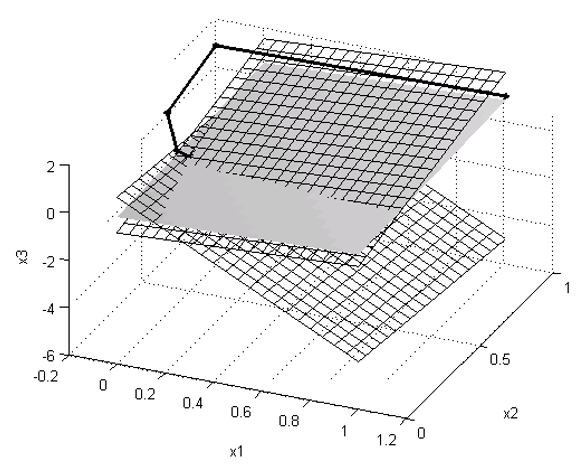
Rys. 5.3. Iteracyjny proces rozwiązywania układu równań metodą Jacobiego

Oznaczając: $M = –D–1(L + U)$ oraz $c = D–1b$ otrzymamy uogólnioną zależność opisującą metodę iteracyjną w postaci:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $x^{k}=Mx^{k-1}+c$
        </td>
        <td>(5.77)</td>
    </tr>
</table>

Jeśli w zależności (5.77) $M$ oraz $c$ nie zależą od numeru iteracji $k$, to taką metodę iteracyjną nazywamy stacjonarną. Metody iteracyjne niestacjonarne zmieniają macierz $M$ oraz wektor $c$ w każdej iteracji.

<b>Przykład 5.16. Metoda Jacobiego – zapis uogólniony</b>

Znaleźć macierz iteracji $M$ oraz wektor $c$ w metodzie Jacobiego dla danych z przykładu 5.14. Zakładamy, że zmienne $A$, $L$, $U$, $D$ i $b$ znajdują się w obszarze zmiennych Pythona.

In [ ]:
M=-1*np.dot(np.linalg.inv(D),(L+U))
print(M)
c=np.linalg.inv(D)*b
print(c)

<h4>5.3.2.2. Metoda Gaussa-Seidla</h4>

Metoda Gaussa-Seidla jest modyfikacją metody Jaccobiego, polegającą na wykorzystaniu obliczonych n-pierwszych składowych wektora niewiadomych (k – 1)-szej iteracji. Porównajmy układy równań. Korzystając z danych z przykładu 5.15, dla metody Jaccobiego, mamy:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{bmatrix}x_{1}^{(k)}\\ x_{2}^{(k)}\\ x_{3}^{(k)}\end{bmatrix}=\begin{bmatrix}0 & -0,2 & -0,2\\ 0,25 & 0 & 0,5\\ 0,33 & 0,33 & 0\end{bmatrix}\begin{bmatrix}x_{1}^{(k-1)}\\ x_{2}^{(k-1)}\\ x_{3}^{(k-1)}\end{bmatrix}+\begin{bmatrix}0,2\\ 0,25\\ 0,17\end{bmatrix}$
        </td>
        <td>(5.78)</td>
    </tr>
</table>
Dla metody Gaussa-Seidla układ równań będzie wyglądał następująco:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\begin{bmatrix}x_{1}^{(k)}\\ x_{2}^{(k)}\\ x_{3}^{(k)}\end{bmatrix}=\begin{bmatrix}0 & -0,2 & -0,2\\ 0 & 0 & 0,5\\ 0 & 0 & 0\end{bmatrix}\begin{bmatrix}x_{1}^{(k-1)}\\ x_{2}^{(k-1)}\\ x_{3}^{(k-1)}\end{bmatrix}+\begin{bmatrix}0 & 0 & 0\\ 0,25 & 0 & 0\\ 0,33 & 0,33 & 0\end{bmatrix}\begin{bmatrix}x_{1}^{(k)}\\ x_{2}^{(k)}\\ x_{3}^{(k)}\end{bmatrix}+\begin{bmatrix}0,2\\ 0,25\\ 0,17\end{bmatrix}$
        </td>
        <td>(5.79)</td>
    </tr>
</table>
Wartość $x_{2}^{(k)}$ jest wyliczana na podstawie następnej składowej wektora z poprzedniej iteracji $x_{3}^{(k-1)}$. W przypadku poprzednich składowych wektora niewiadomych, korzystamy z wartości obliczonych w bieżącej iteracji, tzn. $x_{1}^{(k)}$. W zapisie uogólnionym:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $x^{(k)}=M_{u}x^{(k-1)}+M_{l}x^{(k)}+c$
        </td>
        <td>(5.80)</td>
    </tr>
</table>
<h4>5.3.2.3. Zbieżność metod iteracyjnych</h4>

W metodach iteracyjnych obliczenia prowadzone są z reguły do chwili, w której zmiany wartości rozwiązania w dwóch kolejnych iteracjach są wystarczające małe. W zapisie matematycznym obliczenia powinny zostać zatrzymane, gdy:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $x^{(k)}-x{(k-1)}\leq TOL$
        </td>
        <td>(5.81)</td>
    </tr>
</table>
Nierówność ta nazywana jest testem zbieżności. Jeśli jest spełniona, można powiedzieć, że iteracje są zbieżne i prowadzą do uzyskania rozwiązania o założonej dokładności. Wartość TOL w teście zbieżności jest małą dodatnią liczbą i nazywana jest dokładnością.

<b>Przykład 5.17. Test zbieżności</b>

Wyznaczyć wartość różnicy między kolejnymi rozwiązaniami układu równań z przykładu 5.15. Wyniki przedstawić w formie wykresu.

In [ ]:
test=np.linalg.norm(x[:,:-1]-x[:,1:],axis=0)
plt.plot(test)
plt.xlabel('Numer iteracji')
plt.ylabel('Test zbieznosci')
plt.grid()
plt.show()

Rys. 5.4. Test zbieżności dla kolejnych iteracji w przykładzie 5.15

DNa wykresie (rys. 5.4) widać, że wartość błąd w rozwiązaniu od 7 iteracji praktycznie nie ulega zmianie, a więc w tej iteracji należałoby przerwać obliczenia. Polecenie norm oblicza normę euklidesową macierzy.
 
Dokładność metody iteracyjnej w teście zbieżności jest określana z reguły przez użytkownika algorytmu, a jej wartość jest ograniczona jedynie przez dokładność obliczeniową wykorzystywanej maszyny cyfrowej $\eta_{m}$. Należy przy tym pamiętać, że zmniejszanie wartości TOL prowadzi z reguły do lepszego przybliżenia rozwiązania, ale oznacza jednocześnie konieczność zrealizowania większej liczby iteracji, co wydłuża czas obliczeń.

Metody iteracyjne nie zawsze są zbieżne, czyli niekiedy nie pozwalają na uzyskanie wystarczająco dokładnego rozwiązania (lub rozwiązania w ogóle). Ponadto, nawet gdy zbieżność jest możliwa, proces jej uzyskiwania nie koniecznie przebiega w sposób monotoniczny.

Warunek konieczny i wystarczający zbieżności dowolnej metody iteracyjnej określono z warunku Couch’ego. W warunku tym ciąg kolejnych przybliżeń $x^{(k)}$ jest zbieżny do rozwiązania dokładnego $x$ dla dowolnego rozwiązania początkowego $x^{(0)}$ wtedy i tylko wtedy, gdy promień spektralny macierzy iteracji $\rho(M)$ jest mniejszy od 1.
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\rho(M)<1$
        </td>
        <td>(5.82)</td>
    </tr>
</table>
Promień spektralny to wartość własna macierzy $M$ o maksymalnej wartości bezwzględnej.

Przykład 5.18. Test zbieżności

Wyznaczyć promień spektralny macierzy iteracji $M$ z przykładu 5.15.

In [ ]:
ro=max(abs(np.linalg.eigvals(M)))
print(ro)

Ponieważ promień spektralny macierzy jest mniejszy od 1, metoda iteracyjna Jacobiego z macierzą iteracji $M$ wyznaczoną dla danej macierzy głównej układu A będzie zbieżna.

Wyznaczenie promienia spektralnego macierzy iteracji $M$ w trakcie rozwiązywania układów równań liniowych metodami iteracyjnymi nie jest regułą. Dla metod niestacjonarnych musiałoby być ono przeprowadzane osobno w każdej iteracji. Oznacza to, że w trakcie realizacji obliczeń nie wiemy, czy zastosowana metoda iteracyjna będzie zbieżna. Dlatego w metodach iteracyjnych wprowadza się dodatkowy parametr określający po ilu iteracjach, w przypadku nieosiągnięcia zbieżności, należy bezwzględnie przerwać obliczenia.

<h3>5.4. PRZYKŁADY ROZWIĄZYWANIA UKŁADÓW RÓWNAŃ LINIOWYCH</h3>

<h4>5.4.1. Metody dokładne</h4>

Za rozwiązywanie układów równań liniowych w Pythonie odpowiedzialna jest komenda ```solve```. Wykorzystuje on metody dokładne. Wybór konkretnej metody bazuje na automatycznej analizie struktury macierzy głównej układu $A$ wykonywanej w następujący sposób:
1.	Jeśli macierz A jest macierzą diagonalną, rozwiązanie uzyskiwane jest jak w przykładzie 5.7.
2.	Jeśli macierz A jest macierzą trójkątną górną lub dolną, wykorzystywane jest postępowanie odwrotne lub postępowanie wprost.
3.	Jeśli macierz A jest macierzą, z której można utworzyć macierz trójkątną przez proste przestawienie wierszy lub kolumn, to wykorzystywane jest postępowanie odwrotne po uprzednim przestawieniu wierszy lub kolumn.
4.	Jeśli macierz A jest symetryczna, dodatnio zorientowana, wykorzystywany jest rozkład Cholesky’ego.
5.	Jeśli macierz A jest kwadratowa i nie zaszły przypadki od 1 do 4, do rozwiązania układu równań wykorzystywany jest rozkład LU.

<b>Przykład 5.19. Rozwiązanie układu równań za pomocą metod dokładnych</b>

Rozwiązać układ równań dla zadania z przykładu 5.1.

In [ ]:
A=np.matrix([[0, 0, 1, 0, 0, 0],[0, 0, 0, 1, 1, 0],
            [0, 0, 0, 0, -3.0*np.sin(45.0*np.pi/180.0), 0],[1, 0, 0, 0, 0, 0],
            [0, 1, 0, -1, 0, 0],[0, 0, 0, -23, 0, 1]],np.float64)

b=np.matrix([[0], [300], [300.0*0.5*3.0*np.sin(45.0*np.pi/180.0)+200.0],
                  [30.0*np.cos(60.0*np.pi/180.0)],[3.0*100.0+2.0*300.0+30.0*np.sin(60.0*np.pi/180.0)],
                  [3.0*100.0*0.5*3.0+2.0*300.0*3.0+30.0*(2.0/3.0)*3.0*np.sin(60.0*np.pi/180.0)]])

x0=np.linalg.solve(A,b)
print(x0)

Wektor wyrazów wolnych $b$ może składać się z wielu kolumn. Pozwala skorzystać to z zalet rozkładów Cholesky’ego i LU, czyli rozwiązywać układy równań przy jednokrotnym rozkładzie macierzy głównej dla wielu różnych wektorów wyrazów wolnych.

<b>Przykład 5.20. Rozwiązanie układu równań dla dwóch zestawów danych</b>

Ustalić wartości reakcji dla przykładu 5.19, dodatkowo definiując drugi wektor wyrazów wolnych, w którym zwiększono dwukrotnie wartość sił.

Wprowadzamy oba wektory wyrazów wolnych do Pythona.

In [ ]:
b1=np.matrix([[0], [300], [300*0.5*3*np.sin(45*np.pi/180)+200], 
             [30*np.cos(60*np.pi/180)],
             [3*100+2*300+30*np.sin(60*np.pi/180)],
             [3*100*0.5*3+2*300*3+30*(2/3)*3*np.sin(60*np.pi/180)]])
b2=np.matrix([[0], [2*300], [2*300*0.5*3*np.sin(45*np.pi/180)+2*200],
             [2*30*np.cos(60*np.pi/180)],
             [2*3*100+4*300+2*30*np.sin(60*np.pi/180)],
             [2*3*100*0.5*3+4*300*3+2*30*(2/3)*3*np.sin(60*np.pi/180)]])
print(b1)
print(b2)

Tworzymy macierz wyrazów wolnych przez „sklejenie” obu wektorów.

In [ ]:
bd = np.concatenate((b1,b2),axis=1)
print(bd)

Rozwiązujemy układ równań:

In [ ]:
x0=np.linalg.solve(A,bd)
print(x0)

Pierwsza kolumna macierzy niewiadomych $x$ zawiera rozwiązanie dla pierwszej kolumny macierzy wyrazów wolnych, druga – dla drugiej.

5.4.2.	Metody iteracyjne

W podstawowej konfiguracji Python dysponuje poniższymi metodami iteracyjnymi (niestacjonarnymi) do rozwiązywania układów równań liniowych. Polecenia odpowiedzialne za realizację obliczeń dowolną metodą posiadają identyczną składnię:

x=metoda(A,b)
gdzie: x – zmienna, w której zostanie umieszczony wektor rozwiązań, A – macierz główna układu równań, b – wektor wyrazów wolnych.

Metody dostępne w Pythonie to:
Bicg	Biconjugate gradient
Bicgstab	Biconjugate gradient stabilized
Cg	conjugate gradient
Cgs	Conjugate gradient squared
gmres	Generalized minimum residual
Lsqr	Conjugate Gradients on the Normal Equations
minres	Minimum residual
Qmr	Quasiminimal residual

Podstawowym kryterium wyboru metody iteracyjnej jest znajomość własności macierzy głównej układu $A$. I tak, np. metoda cg wymaga, aby macierz A była symetryczna dodatnio zorientowana. Metoda minres może być wykorzystane dla macierzy symetrycznej niezorientowanej. Metoda lsqr umożliwia rozwiązanie układów równań o niekwadratowej macierzy $A$. Pozostałych pięć metod można natomiast zastosować dla kwadratowych macierzy $A$ dowolnego typu.

<b>Przykład 5.21. Rozwiązanie układu równań metodami iteracyjnymi</b>

Rozwiązać zadanie z przykładu 5.1 stosując wszystkie dziewięć metod iteracyjnych. Określić, która z metod prowadzi do uzyskania najdokładniejszego rozwiązania oraz umożliwia uzyskanie rozwiązania w najmniejszej liczbie iteracji.

In [ ]:
x1 = scilin.bicg(A,b)
x2 = scilin.bicgstab(A,b)
x3 = scilin.cg(A,b)
x4 = scilin.cgs(A,b)
x5 = scilin.gmres(A,b)
x6 = scilin.lgmres(A,b)
x7 = scilin.minres(A,b)
x8 = scilin.qmr(A,b)
print(x1)
print(x2)
print(x3)
print(x4)
print(x5)
print(x6)
print(x7)
print(x8)

<h3>5.5. ZADANIA</h3>

<b>Zadanie 5.1</b>

Rozwiązać układ równań w postaci:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
        $\left\{\begin{matrix}-P_{1}cos\alpha-S_{2}sin\beta-S_{6}sin\beta=0\\ -P_{1}sin\alpha+P_{2}-S_{4}cos\gamma=0\\ S_{1}+S_{2}cos\beta+S_{3}+S_{4}sin\gamma+S_{5}+S_{6}cos\beta-G=0\\ -(S_{5}+S_{6}cos\beta)a-G\frac{a}{2}=0\\ -(S_{3}+S_{5}+S_{4}sin\gamma)b+G\frac{b}{2}=0\\ M+P_{2}b+S_{6}a sin\beta-S_{4}b cos\gamma=0\end{matrix}\right.$
        </td>
        <td>(5.83)</td>
    </tr>
</table>

Dane:
$G$ = 20000
$P_{1}$ = 40000
$P_{2}$ = 30000
M = 60000
a = 2
b = h = 1
$\alpha$ = 30&deg;
$\beta$ = 45&deg;
$\gamma$ = arctg(0,5 rad)

Wyznaczyć:
-	rząd macierzy głównej układu równań,
-	współczynnik uwarunkowania macierzy głównej układu równań,
-	rozwiązanie układu równań z określeniem jednostek fizycznych. Układ równań rozwiązać metodą dokładną oraz dowolną metodą iteracyjną.

<b>Zadanie 5.2</b>

Rozwiązać układ równań w postaci:
<table width=100%>
    <tr>
        <td width=95% style="text-align:center">
$\begin{cases}f_{2}=f_{6}\\f_{3}=10000\\f_{1}cos\alpha=f_{4}+f_{5}cos\alpha\\f_{1}sin\alpha+f_{3}+f_{5}sin\alpha=0\\f_{4}=f_{8}\\f_{7}=0\\f_{5}cos\alpha+f_{6}=f_{9}cos\alpha+f_{10}\\f_{5}sin\alpha+f{7}+f_{9}sin\alpha=15000\\f_{10}=f_{13}\\f_{11}=20000\\f_{8}+f_{9}cos\alpha=f_{12}cos\alpha\\f_{9}sin\alpha+f_{11}+f_{12}sin\alpha=0\\f_{13}+f_{12}cos\alpha=0\end{cases}$
        </td>
        <td>(5.84)</td>
    </tr>
</table>

Dane:
$\alpha$=45&deg;

Wyznaczyć:
-	rząd macierzy głównej układu równań,
-	współczynnik uwarunkowania macierzy głównej układu równań,
-	rozwiązanie układu równań z określeniem jednostek fizycznych. Układ równań rozwiązać metodą dokładną oraz dowolną metodą iteracyjną.

<h3>5.6. PYTANIA</h3>

1.	Podaj zależność formalnego rozwiązania układu równań liniowych Ax = b.
2.	Podaj powody, dla których nie wykorzystuje się rozwiązania formalnego.
3.	Podaj nazwy metod dokładnych rozwiązywania układu równań liniowych.
4.	Opisz znaczenie współczynnika uwarunkowania (A) na dokładność rozwiązania.
5.	Podaj powód częściowego wyboru elementu podstawowego.
6.	Opisz procedurę rozwiązywania układu równań liniowych mając dany rozkład LU macierzy głównej układu.
7.	Podaj warunek zbieżności dowolnej metody iteracyjnego rozwiązywania układu równań liniowych.
8.	Czym są tolerancja i maksymalna liczba iteracji w metodach iteracyjnych.

<h3>5.7. LITERATURA</h3>

1.	Banachowski L., Diks K., Rytter W., 1999. Algorytmy i struktury danych. WNT Warszawa.
2.	Fortuna Z., Macukow B., Wąsoski J., 1993. Metody numeryczne. WNT Warszawa.
3.	Moler C., 2004. Numerical Computing with MATLAB. SIAM.
4.	Press W.H., Teukolsky S.A., Vetterling W.T., Flannery B.P., 1992. Numerical Recipes in C. The Art of Scientific Computing. Cambridge University Press.
5.	Recktenwald G., 2000. Numerical Methods with MATLAB. Implementations and Applications. Prentice Hall.
6.	Zalewski A., Cegieła R., 1997. Matlab – obliczenia numeryczne i ich zastosowania. Wydawnictwo NAKOM Poznań.
7.	Praca zbiorowa pod redakcją M. Conder, 1998. Introductory Tutorial for the Advanced Computing Laboratory. Materiały kursu Numerical Computation (445.270), University of Auckland.
8.	Siołkowski B., Holka H., Malec M., 1988. Zbiór zadań ze statyki i wytrzymałości materiałów. Wyd. Uczeln. ATR w Bydgoszczy.

Copyright 2005-2019, dr inż. Krzysztof Nowicki